In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
files = ['got1.txt', 'got2.txt', 'got3.txt', 'got4.txt']
#See what the text looks like
open(files[0], 'r', encoding='UTF-8').read()[:3000]

'PROLOGUE\n\nThe comet’s tail spread across the dawn, a red slash that bled above the crags of Dragonstone like a wound in the pink and purple sky.\n\nThe maester stood on the windswept balcony outside his chambers. It was here the ravens came, after long flight. Their droppings speckled the gargoyles that rose twelve feet tall on either side of him, a hellhound and a wyvern, two of the thousand that brooded over the walls of the ancient fortress. When first he came to Dragonstone, the army of stone grotesques had made him uneasy, but as the years passed he had grown used to them. Now he thought of them as old friends. The three of them watched the sky together with foreboding.\n\nThe maester did not believe in omens. And yet . . . old as he was, Cressen had never seen a comet half so bright, nor yet that color, that terrible color, the color of blood and flame and sunsets. He wondered if his gargoyles had ever seen its like. They had been here so much longer than he had, and would sti

There are extra "\n" which should be removed. The following code cleans the text as well as splits the text into lines. The result is a list of four lists of lines.

In [3]:
def read_file(file):

    with open(file, 'r', encoding='UTF-8') as f:
        lines = (line.rstrip() for line in f) 
        lines = list(line for line in lines if line)
    return lines

    
#4 lists of list of lines (4 books)
text_list = []
for f in files:
    text_list.append(read_file(f))

In [4]:
text_list[0][:10]

['PROLOGUE',
 'The comet’s tail spread across the dawn, a red slash that bled above the crags of Dragonstone like a wound in the pink and purple sky.',
 'The maester stood on the windswept balcony outside his chambers. It was here the ravens came, after long flight. Their droppings speckled the gargoyles that rose twelve feet tall on either side of him, a hellhound and a wyvern, two of the thousand that brooded over the walls of the ancient fortress. When first he came to Dragonstone, the army of stone grotesques had made him uneasy, but as the years passed he had grown used to them. Now he thought of them as old friends. The three of them watched the sky together with foreboding.',
 'The maester did not believe in omens. And yet . . . old as he was, Cressen had never seen a comet half so bright, nor yet that color, that terrible color, the color of blood and flame and sunsets. He wondered if his gargoyles had ever seen its like. They had been here so much longer than he had, and would

# Character Occurrences

In [5]:
def get_main_characters(text):
    #Since each chapter is titled with one of the main character's name, it makes sense to find all lines with exactly one item
    singlewords = [line for line in text if len(line.split()) == 1]
    
    #filter out all the words with punctuation as those are not names
    for word in singlewords:
        for j in word:
            if j in string.punctuation:
                singlewords.remove(word)
                break

    #there are still some words with punctuation in them that somehow passed the filter as well as duplicates
    #adding counts to the unique words can help with identifying names
    words_count= {}
    for word in singlewords:
        if word in words_count:
            words_count[word] += 1
        else:
            words_count[word] = 0
    
    #words with count > 2 are most likely names as each character most likely has more than 2 chapters
    characters = [word for word, count in words_count.items() if count > 2]
    
    return characters

Get unique list of main characters

In [6]:
character_list = list(set(get_main_characters(text_list[0]) + get_main_characters(text_list[1])+
                              get_main_characters(text_list[2]) + get_main_characters(text_list[3])))
                              
character_list

['CERSEI',
 'SAMWELL',
 'TYRION',
 'THEON',
 'BRAN',
 'SANSA',
 'DAENERYS',
 'DAVOS',
 'BRIENNE',
 'JAIME',
 'JON',
 'ARYA',
 'CATELYN']

In [7]:
#4 lists of text (4 books)
text_line = [' '.join(line) for line in text_list]
#4 lists of tokenized text
text_token = [line.split() for line in text_line]
text_token[0][:15]

['PROLOGUE',
 'The',
 'comet’s',
 'tail',
 'spread',
 'across',
 'the',
 'dawn,',
 'a',
 'red',
 'slash',
 'that',
 'bled',
 'above',
 'the']

In [8]:
df = pd.DataFrame(columns=['Character', 'Book', 'Offset'])

num_occurrences = {character:0 for character in character_list}
for book in range(len(text_token)):
    for character in character_list:
        for offset in range(len(text_token[book])):
            if character.lower() in text_token[book][offset].lower():
                df = df.append(pd.Series([character, book, offset], index=df.columns), ignore_index=True)
                num_occurrences[character] += 1
                
num_occurrences

{'CERSEI': 1084,
 'SAMWELL': 62,
 'TYRION': 2065,
 'THEON': 931,
 'BRAN': 1224,
 'SANSA': 974,
 'DAENERYS': 288,
 'DAVOS': 688,
 'BRIENNE': 723,
 'JAIME': 1417,
 'JON': 2429,
 'ARYA': 1186,
 'CATELYN': 628}

<BarContainer object of 13 artists>

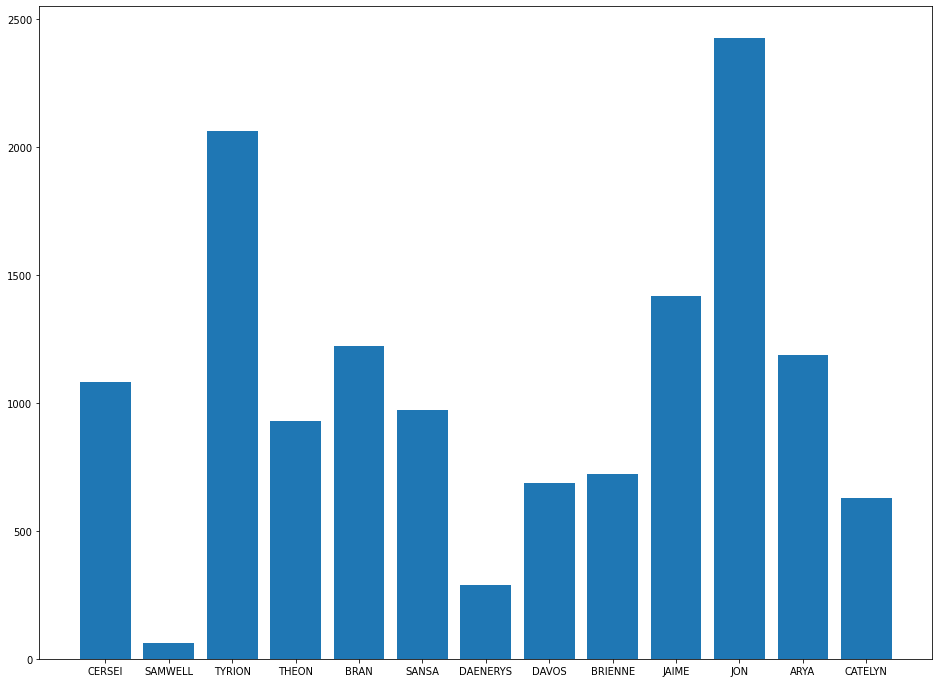

In [21]:
plt.figure(figsize=(16,12))
plt.bar(num_occurrences.keys(), num_occurrences.values())

Jon and Tyrion have the most occurrences out of all the main characters.
Characters that don't go by their full name doesn't show up as much as they should (eg DANY = DAENERYS, SAM = SAMWELL)

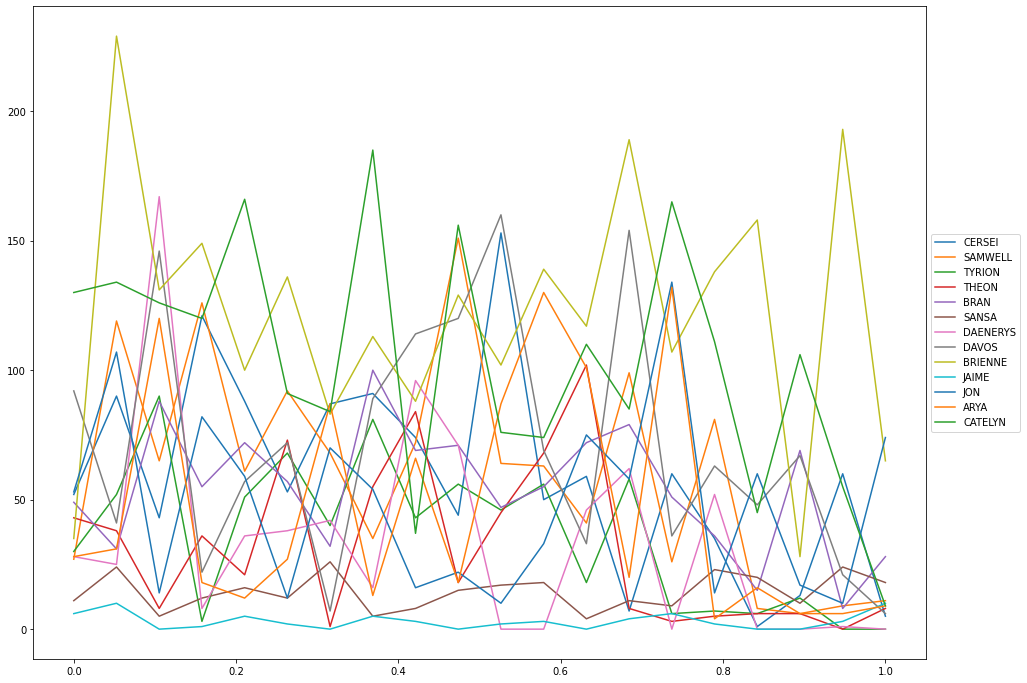

In [9]:
x = df.groupby('Character')['Offset'].agg(list)
plt.figure(figsize=(16,12))
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, label=character_list)
plt.clf()
ax = plt.subplot(111)
for i, a in enumerate(n):
        ax.plot([float(x) / (num_bins - 1) for x in range(len(a))], a, label=character_list[i])
        
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
df.groupby('Character')['Offset'].agg(list)[:5]

Character
ARYA       [10230, 10237, 10535, 10560, 10619, 10859, 109...
BRAN       [1531, 11628, 12701, 13964, 13970, 16562, 2321...
BRIENNE    [114879, 114892, 114925, 114966, 115061, 11515...
CATELYN    [35313, 35326, 35524, 35614, 35933, 36117, 362...
CERSEI     [13579, 17908, 17947, 18043, 18210, 18397, 188...
Name: Offset, dtype: object

/home/wenfong/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


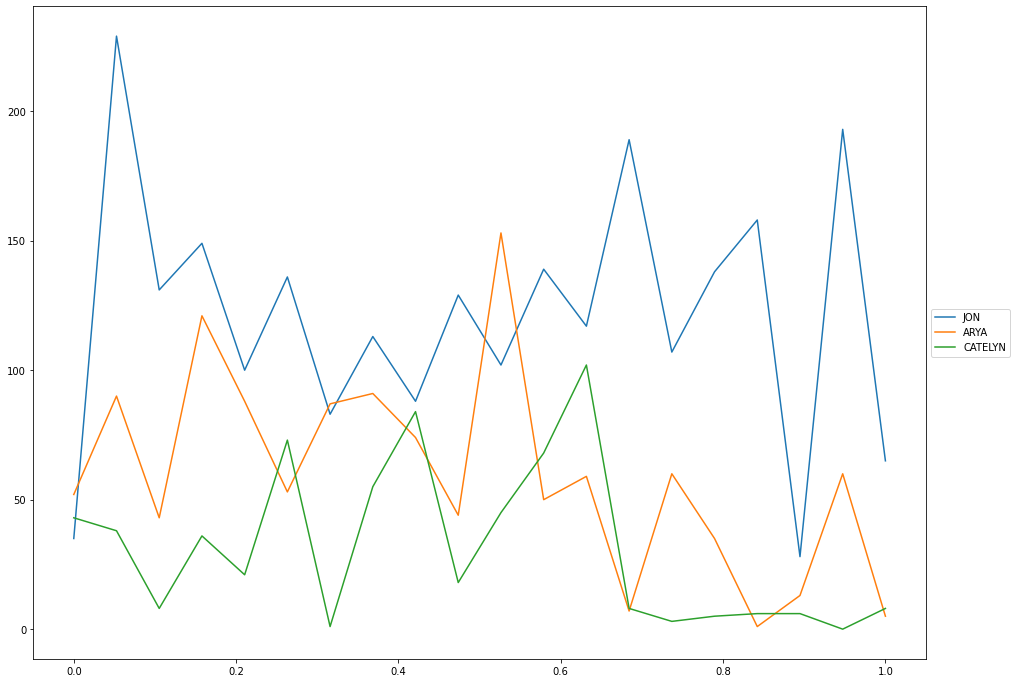

In [11]:
characters_of_interest = ['JON', 'ARYA', 'CATELYN']
x = [df.groupby('Character')['Offset'].agg(list)[c] for c in characters_of_interest]
plt.figure(figsize=(16,12))
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, label=characters_of_interest)
plt.clf()
ax = plt.subplot(111)
for i, a in enumerate(n):
        ax.plot([float(x) / (num_bins - 1) for x in range(len(a))], a, label=characters_of_interest[i])
        
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))